<a href="https://colab.research.google.com/github/TheLawal24/Task/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(5, 32)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Unnamed: 31
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,NaN
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,NaN
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,NaN
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,NaN
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         5 non-null      int64  
 1   V1           5 non-null      float64
 2   V2           5 non-null      float64
 3   V3           5 non-null      float64
 4   V4           5 non-null      float64
 5   V5           5 non-null      float64
 6   V6           5 non-null      float64
 7   V7           5 non-null      float64
 8   V8           5 non-null      float64
 9   V9           5 non-null      float64
 10  V10          5 non-null      float64
 11  V11          5 non-null      float64
 12  V12          5 non-null      float64
 13  V13          5 non-null      float64
 14  V14          5 non-null      float64
 15  V15          5 non-null      float64
 16  V16          5 non-null      float64
 17  V17          5 non-null      float64
 18  V18          5 non-null      float64
 19  V19         

In [18]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Unnamed: 31
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,0.0
mean,0.80000,-0.730162,-0.090856,1.563549,0.349166,-0.239801,0.704730,0.356561,0.107676,-0.395115,...,0.242879,0.114489,-0.399301,0.081887,0.015609,0.070273,0.042106,144.892000,0.0,NaN
std,0.83666,1.086764,0.811731,0.865298,0.797262,0.249831,0.797477,0.339994,0.242901,1.037269,...,0.596429,0.458004,0.547679,0.380732,0.304669,0.109967,0.106576,142.266623,0.0,NaN
min,0.00000,-1.359807,-1.340163,0.166480,-0.863291,-0.503198,-0.082361,-0.078803,-0.270533,-1.514654,...,-0.638672,-0.190321,-1.175575,-0.327642,-0.221929,-0.055353,-0.059752,2.690000,0.0,NaN
25%,0.00000,-1.358354,-0.185226,1.548718,0.379780,-0.407193,0.095921,0.237609,0.085102,-1.387024,...,0.005274,-0.137458,-0.689281,-0.206010,-0.189115,-0.008983,-0.021053,69.990000,0.0,NaN
50%,1.00000,-1.158233,-0.072781,1.773209,0.403034,-0.338321,0.462388,0.239599,0.098698,-0.255425,...,0.277838,-0.110474,-0.339846,0.128539,-0.139097,0.062723,0.014724,123.500000,0.0,NaN
75%,1.00000,-0.966272,0.266151,1.792993,0.448154,-0.010309,1.247203,0.592941,0.247676,0.363787,...,0.771679,0.101288,0.066928,0.167170,0.125895,0.133558,0.061458,149.620000,0.0,NaN
max,2.00000,1.191857,0.877737,2.536347,1.378155,0.060018,1.800499,0.791461,0.377436,0.817739,...,0.798278,0.909412,0.141267,0.647376,0.502292,0.219422,0.215153,378.660000,0.0,NaN


Show are fraud and how many are not fraud??

In [13]:
class_names = {0:'Not Fraud', 2:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    5
Name: Class, dtype: int64


Plotting the variables using subplots

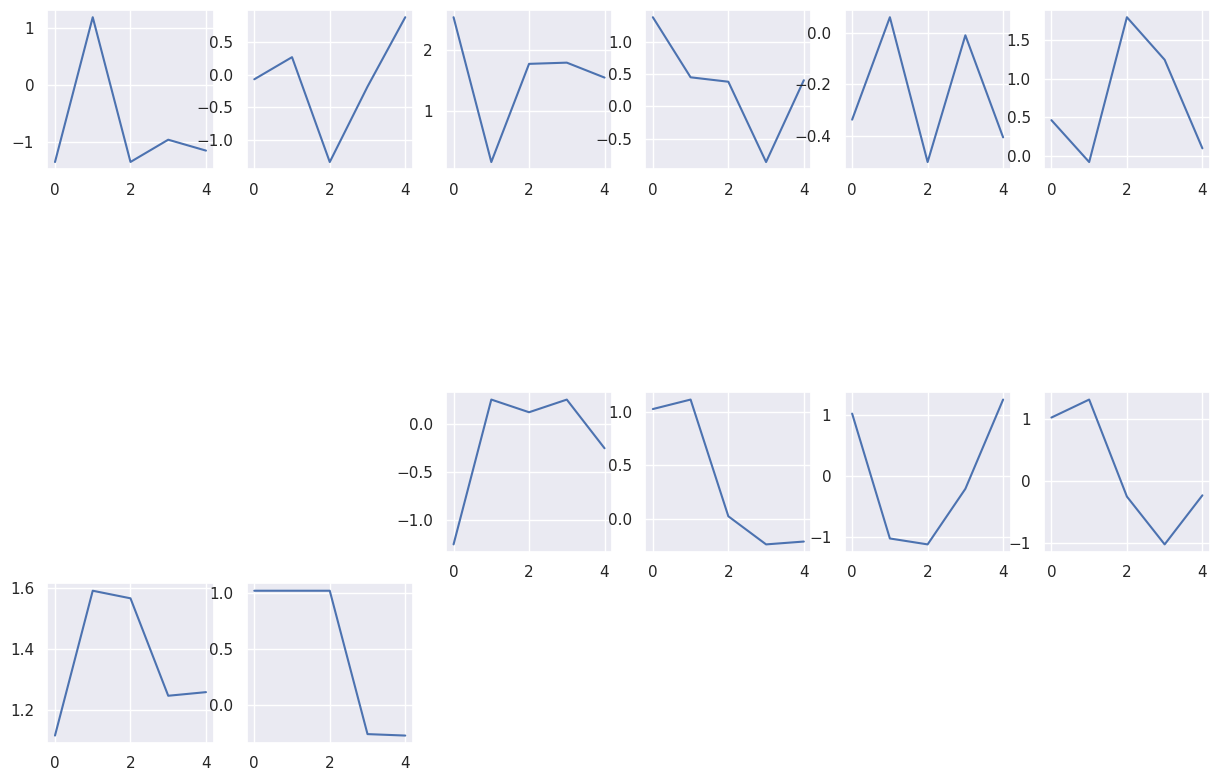

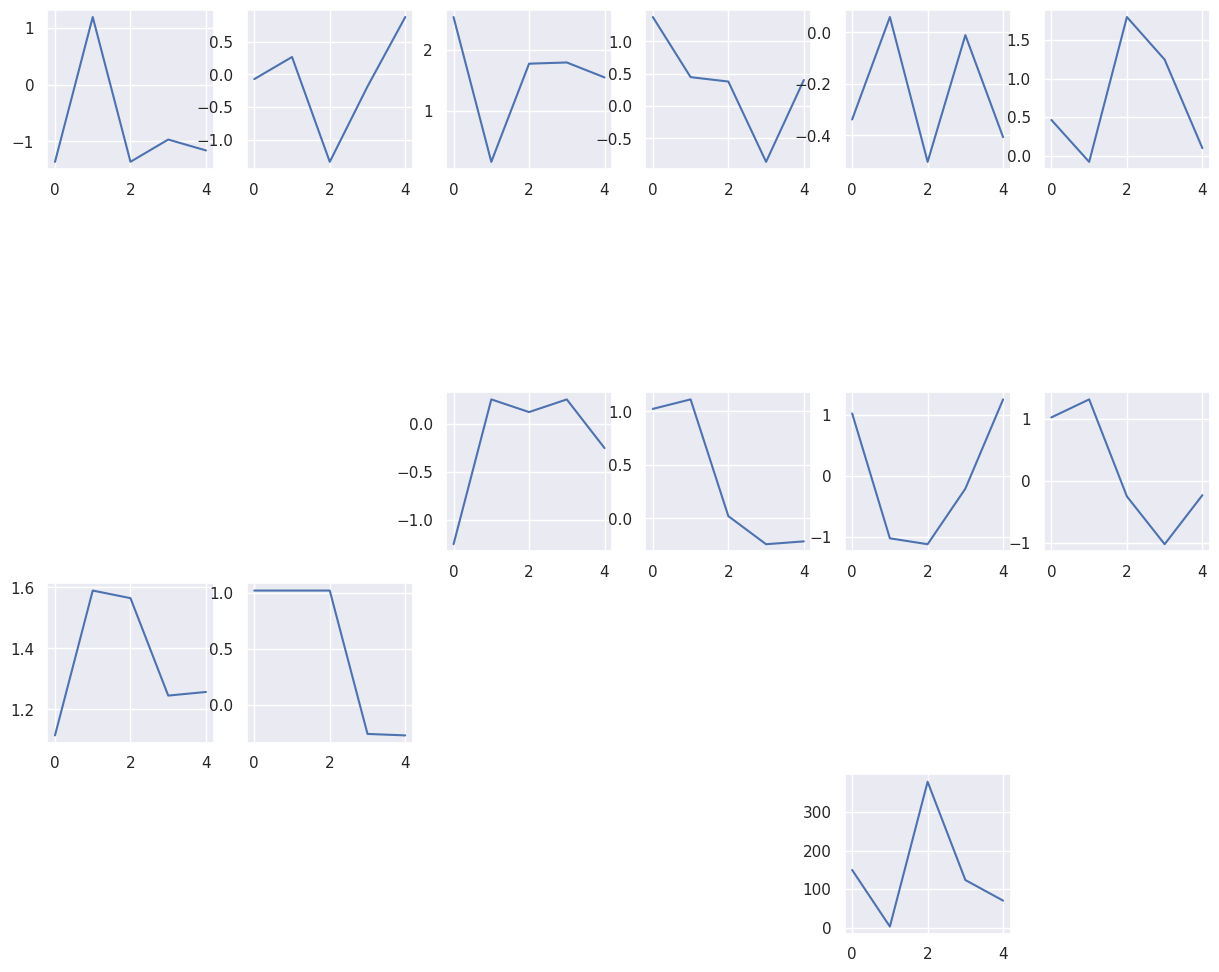

In [20]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
fig = plt.figure(figsize = (15, 12))
plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

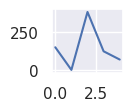

In [21]:
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

In [22]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class', 'Unnamed: 31'], dtype='object')


In [27]:
data_features = df[feature_names]
data_target = df[target]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 3
Length of X_test is: 2
Length of y_train is: 3
Length of y_test is: 2


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class', 'Unnamed: 31'], dtype='object')


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

In [33]:
print(y_train.head())

   Class  Unnamed: 31
4      0          NaN
0      0          NaN
3      0          NaN


To be continued in my private repository...